#### some instructions:
1. External functions must have their own files .py and then imported in this main notebook 
2. Upload notebook with cells already run before handing in the HW 
3. Add to readme.md the link to the notebook as well 

### Importing all necessary libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the dataset from csv file

In [3]:
df = pd.read_csv('dataset/steam_reviews.csv')

In [4]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


### Starting EDA
##### Summary of dataset structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

##### Summary statistics

In [6]:
df.describe()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,1.087369e+07,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,6.277927e+06,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179134e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,0.000000e+00,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.436844e+06,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,1.087369e+07,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,1.631053e+07,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,2.174738e+07,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


##### Check for missing values per column in dataset

In [7]:
df.isnull().sum()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

### [RQ2] Analyzing the distribution of reviews across different applications.
##### Applications with the highest and lowest number of reviews.

In [8]:
# group by app_name to count how many review_id (uniqes) are there

num_reviews = df.groupby('app_name')['review_id'].count().reset_index(name='review_num')

# masking
highest_app = num_reviews[ num_reviews['review_num'] == max(num_reviews['review_num'])].dropna()
lowest_app = num_reviews[ num_reviews['review_num'] == min(num_reviews['review_num'])].dropna()
print(f"Application with the highest number of reviews:\n {highest_app}\n\n")
print(f"Application with the lowest number of reviews:\n {lowest_app}")


Application with the highest number of reviews:
                           app_name  review_num
182  PLAYERUNKNOWN'S BATTLEGROUNDS     1644255


Application with the lowest number of reviews:
            app_name  review_num
164  Neon Hardcorps         200


### Plot of the number of reviews for each application in descending order

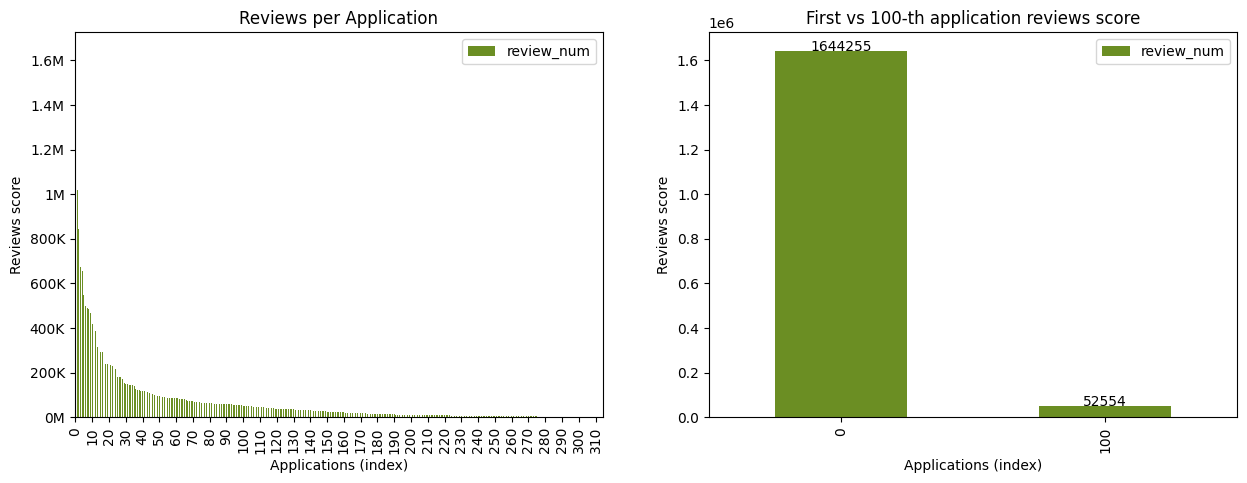

In [46]:
# sorted applications by number of reviews
num=num_reviews.sort_values( by = 'review_num', ascending = False ).reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

num.plot(kind='bar',
         y='review_num',  # 'app_name' is no longer on the x-axis, just the index
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='Reviews per Application', 
         ax=axes[0]
         )


axes[0].set_xticks(range(0, len(num), 10))  # Set ticks at intervals of 10
axes[0].set_xticklabels(range(0, len(num), 10))  # Label the ticks with index numbers
axes[0].set_yticks(np.arange(0, 1.8e6, 0.2e6)) 
axes[0].set_yticklabels(['0M', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'])


# zooming in on the first and 100-th applications
num.iloc[[0,100]].plot(kind='bar',
         y='review_num',  
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='First vs 100-th application reviews score',
         ax = axes[1])

axes[1].text(0, num['review_num'][0], num['review_num'][0], ha = 'center')
axes[1].text(1, num['review_num'][100], num['review_num'][100], ha = 'center')

plt.show()


This bar plot suggests a high imbalance in the review counts distribution: 

- only the first (sorted) 11 applications, that is the 3,5 % of the total, have a number of applications greater or equal then 400000;

- 285 applications, that is the 90,8 % of the total, count a number of applications smaller then 200000;

- as highlighted in the zoomed plot, by the $100^{th}$ application, the review scores are less then the 3,2% of those belonging to first application.

Such insights suggest that the distribution of the number of reviews follows a long-tailed pattern, where review counts exponentialy decay as the number of applications increases. 


The inequality highlights the dominance of a few key apps in attracting user attention, with the top 5 apps accounting for a substantial share of total reviews, as shown below.

### Percentage breakdown for the top five most reviewed applications: purchased vs received for free

In [10]:
# selecting only the rows in df whose app_name is in the top 5 most reviews and adding the review_num column merging on app
df_5 = pd.merge(df, num[:5], on = 'app_name', how = 'inner')

In [11]:
# counting the purchased apps and the got for free ones by summing true values, grouping by app
purchased = df_5.groupby('app_name')['steam_purchase'].sum().reset_index(name='purchased_tot')
for_free = df_5.groupby('app_name')['received_for_free'].sum().reset_index(name='for_free_tot')

#merging to add the column in the respective app_name row
df_5 = pd.merge(df_5, purchased, on='app_name', how='left')
df_5 = pd.merge(df_5, for_free, on='app_name', how='left')


In [12]:
df_5['purchased_percent'] = round((df_5['purchased_tot'] / df_5['review_num']) * 100, 2)
df_5['for_free_percent'] = round((df_5['for_free_tot'] / df_5['review_num']) * 100, 2)

In [13]:
# select only the unique ones
df_5 = df_5.drop_duplicates(subset = ['app_name'])
df_5[['app_name', 'purchased_percent', 'for_free_percent' ]]

,app_name,purchased_percent,for_free_percent
0,Garry's Mod,84.09,3.78
655524,Tom Clancy's Rainbow Six Siege,83.44,4.31
1497442,Grand Theft Auto V,88.83,3.79
2516558,PLAYERUNKNOWN'S BATTLEGROUNDS,83.49,3.74
4160813,Terraria,78.44,3.00


For the top five applications by number of reviews, the majority of reviews — an average of 83.67% — were submitted by users who purchased the application.

The percentages do not sum to 100% because not all users specified whether they received the application for free or purchased it on Steam. We will refer to this gap as missing data.

The following plot illustrates the average breakdown.

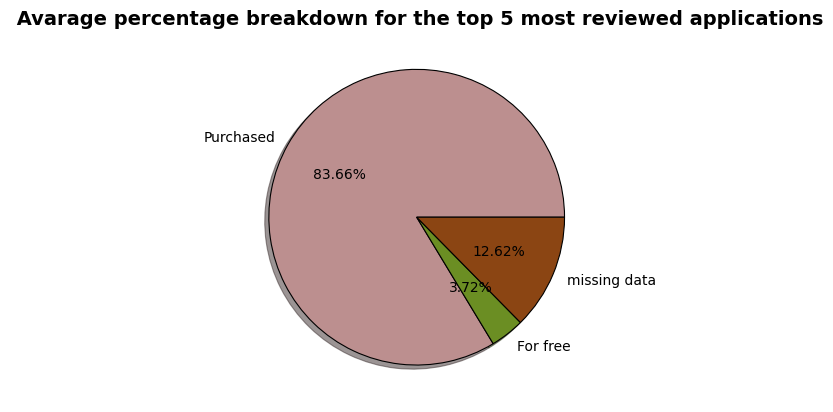

In [39]:
data = [df_5['purchased_percent'].mean(),
      df_5['for_free_percent'].mean(),
      100 - df_5['purchased_percent'].mean()- df_5['for_free_percent'].mean() ]

labels = ['Purchased', 'For free', 'missing data'] 
plt.title(' Avarage percentage breakdown for the top 5 most reviewed applications', fontsize=14, weight='bold')

plt.pie(data, labels = labels, colors = ['rosybrown', 'olivedrab', 'saddlebrown'],
        autopct='%1.2f%%', shadow=True, wedgeprops = {"edgecolor" : "black",'linewidth': 0.8})
plt.show()


### Applications with the most and least user recommendations.

In [15]:
# group by app_name to count how many review_id (uniqes) are there

recommendations = df.groupby('app_name')['recommended'].count().reset_index(name='recommendations_no')

# masking to select the max and min.
# dropping rows with missing data or non numeric values

most_recommended = recommendations[ recommendations['recommendations_no'] == max(recommendations['recommendations_no'])].dropna()
least_recommended = recommendations[ recommendations['recommendations_no'] == min(recommendations['recommendations_no'])].dropna()
print(f"Application with the highest number of recommendations:\n {most_recommended}\n\n")
print(f"Application with the lowest number of recommendations:\n {least_recommended}")

Application with the highest number of recommendations:
                           app_name  recommendations_no
182  PLAYERUNKNOWN'S BATTLEGROUNDS             1644255


Application with the lowest number of recommendations:
            app_name  recommendations_no
164  Neon Hardcorps                 200


As we expected, the most recommended application is the one having the highest number of reviews.

Similarly, the least recommended one is the application with the lowest number of reviews. 

This leads to the hipotesis that the two variables' growth rates are linked to eachother. We need to verify if that is because of a correlation between them, a causation link, or if it is just an exception.

### Correlation between the number of recommendations and the applications' review scores

To assess the relationship between application review scores and the number of recommendations, we first merge the relevant features into a new dataframe, aligning them by the 'app_name' column.

Next, we use the Pandas .corr() function to calculate the correlation between the two variables.

In [16]:
# merging num and recommendation dataframes:
# num dataframe containis review_num column, whose values are the number of reviews for each app_name
# recommendations dataframe contains recommendations_no column = number of reccomendations for each app_name

df_new = pd.merge(num, recommendations, on = 'app_name', how = 'inner')

# computing correlation coefficient through .corr method, which by default computes the Pierson's coefficient
correlation = df_new['review_num'].corr(df_new['recommendations_no'])

print(correlation)

1.0


As expected, the result shows a strong positive correlation, with Pearson's coefficient between 'review_num' and 'recommendations_no' equal to +1.

This indicates a perfect positive correlation, meaning that as one variable increases, the other does as well. This relationship is further illustrated in a scatter plot, where the x-axis represents the number of reviews, and the y-axis shows the number of recommendations.

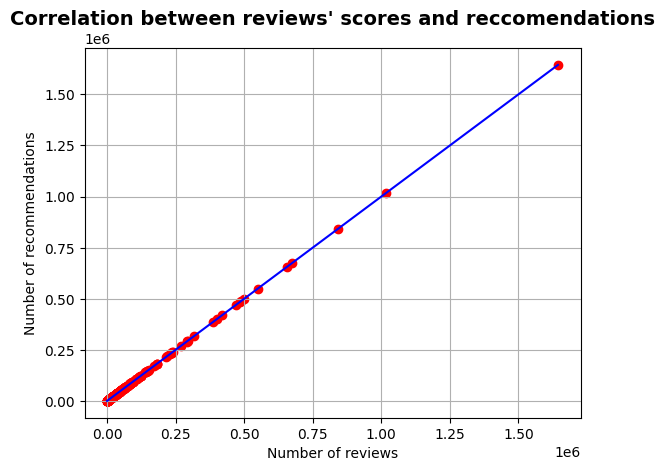

In [34]:
plt.plot(df_new['review_num'], df_new['recommendations_no'], linestyle='-', color='blue')
plt.scatter(x = df_new['review_num'],
            y = df_new['recommendations_no'],
            marker = 'o',
            color = 'red'
            )
plt.xlabel('Number of reviews')
plt.ylabel('Number of recommendations')
plt.title("Correlation between reviews' scores and reccomendations", fontsize=14, weight='bold')
plt.grid()
plt.show()

The plot reveals a perfectly linear relationship between the two variables, which confirms the correlation analysis. As the number of reviews increases, the number of recommendations rises proportionally. This suggests that applications with more reviews also tend to receive more recommendations.

The green trend line connecting the data points reinforces the notion that there is a direct one-to-one relation between the number of reviews and recommendations. Every data point falls along this line, showing no deviation from this pattern.

This relationship could imply that user engagement (measured in terms of recommendations) scales almost directly with the number of reviews an application receives. It is likely that applications which are frequently reviewed also receive more positive feedback, as measured by recommendations.

## [RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.

### Number of reviews submitted each month

In [18]:
# converting timestamps into date and time: Y M D h m s using a lambda function
# and adding it as a new column

from datetime import datetime

df['date_time'] = df['timestamp_created'].apply(lambda i: datetime.fromtimestamp(i))

In [19]:
# creating new columns to store the month and year from date_time

import calendar

df['month_num'] = df['date_time'].apply(lambda i: i.month)

df['year'] = df['date_time'].apply(lambda i: i.year)


In [23]:
# First we create a new dataframe with the columns 'year', 'month_num' and 'reviews_per_month_and_year'
# obtained from the original df DataFrame, grouping by 'year' first, 'month' second
# and using the .count aggregate operator to count how many reviews per month were submitted in every year
# we used 'review_id' values to count since they are uniques

import seaborn as sns

reviews_per_month_and_year = df.groupby(['year', 'month_num'])['review_id'].count().reset_index(name = 'reviews_per_month_and_year')

# sorting by years and month_num
reviews_per_month_and_year  = reviews_per_month_and_year.sort_values(by = ['year', 'month_num'])

reviews_per_month_and_year

,year,month_num,reviews_per_month_and_year
0,2010,11,555
1,2010,12,1816
2,2011,1,826
3,2011,2,575
4,2011,3,591
...,...,...,...
118,2020,9,594792
119,2020,10,640295
120,2020,11,940841
121,2020,12,740297


As emerged from this output, the dataset's collection period began in November 2010 (month_num = 11) and concluded in January 2021 (month_num = 1).

As a result, the distribution of review counts for the first and last years is incomplete and skewed toward zero due to the absence of data for the full year.

To ensure the accuracy of our analysis, we will exclude these partial-year values from the final evaluation.

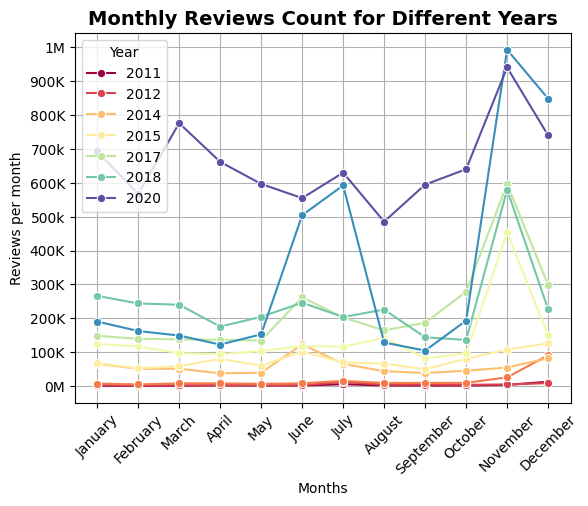

In [35]:
# plot of the trend of review scores by month for each year from 2011 to 2020:

sns.lineplot( data = reviews_per_month_and_year.iloc[2:-1], x= 'month_num', y = 'reviews_per_month_and_year', marker = 'o', hue = 'year', palette = 'Spectral' )
plt.xlabel('Months')
plt.ylabel('Reviews per month')
plt.grid()
plt.legend(title = 'Year')
plt.title('Monthly Reviews Count for Different Years', fontsize=14, weight='bold')

#converting months' indexes to their actual names and adjusting the fit:

plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:])
plt.xticks(rotation=45)

# improving y axis tik frequency:

plt.yticks(ticks=np.arange(0, 1.1e6, 0.1e6), labels=['0M', '100K', '200K', '300K', '400K', '500k', '600K', '700k', '800K', '900K', '1M'])
plt.show()